<a href="https://colab.research.google.com/github/Nuel-10/telco-churn-analysis/blob/main/Telco_Customer_Churn_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telco Customer Churn Analysis**

This project analyzes customer churn data to identify why customers leave.

## **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('Telco-Customer-Churn.xlsx')
print("Dataset shape:", df.shape)
print("\nData Types and Missing Values:\n")
print(df.info())

Dataset shape: (7043, 21)

Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-nul

In [ ]:
# Preview of dataset
print("\nFirst 10 rows:\n", df.head())


First 10 rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [ ]:
# Fix Data Types: Convert Total Charges to Numeric Data Type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Finding and Handling Missing Values
df['TotalCharges']= df['TotalCharges'].fillna(0)

In [ ]:
# Remove Unique Identifiers that don't heelp predictions
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Standarization of Categories
#Consolidate "No internet service" and "No phone service" into "No"
cols_to_fix=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in cols_to_fix:
  df[col]=df[col].replace({'No internet service': 'No', 'No phone service':'No'})

In [ ]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Save our Work
df.to_excel('Telco-Customer-Churn-Cleaned.xlsx', index=False)

## **Exploratory Data Analysis (EDA)**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Re-load the original dataset and perform cleaning steps
df = pd.read_excel('Telco-Customer-Churn.xlsx')

# Fix Data Types: Convert Total Charges to Numeric Data Type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Finding and Handling Missing Values
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Remove Unique Identifiers that don't help predictions
df.drop('customerID', axis=1, inplace=True)

# Standarization of Categories
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in cols_to_fix:
  df[col] = df[col].replace({'No internet service': 'No', 'No phone service':'No'})

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Ensure the DataFrame is saved before attempting to read it
df.to_excel('Telco-Customer-Churn-Cleaned.xlsx', index=False)
read_file = pd.read_excel('Telco-Customer-Churn-Cleaned.xlsx')

/tmp/ipython-input-555020646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=df, palette='viridis')


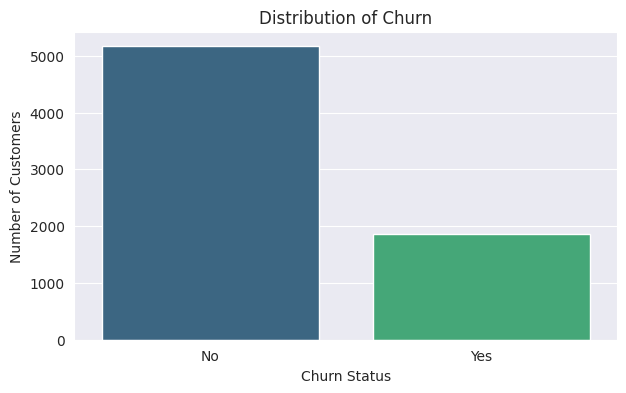

Churn Rate: 
Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


In [ ]:
# Lets Set the Visual style
sns.set_style("darkgrid")

# Plotting the Distribution of Churn
plt.figure(figsize=(7,4))
sns.countplot(x='Churn',data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()


# To calculate the percentage for context
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate: \n{churn_rate}")
plt.show()

# Target Variable Distribution (Churn)
To understand the proportion of customers who have left the company (chunred) and those who stayed.
## FIndings
*   Stayed (No): 73.55% (approx. 5,174 customers)
*   Churned (Yes): 26.45% (approx. 1,869 customers)
## Insight
*   Imbalance Dataset: The dataset is imbalanced, with 3 out of every 4 customers staying. This is a healthy majority, meaning that 26.5% churn rate is enough to warrent a deep investigation into the causes.

*   Baseline Metric: A predictive model must perform better than a "dummy" model that simply predicts "No" for everyone (which would be 73.5% accurate but useless for business).

*   Business Impact: Losing over a quater of the customer base indicates a clear opportunity for revenue recovery through targeted retention strategies.

## What to look for
Since we know who is leaving in total, the next step is to identify why:
*   Are the 26.45% of churners mostly new customers?
*   Do they have higher than average monthly charges?
*   Are they concentrated in a specific contract type (Month-to-month, one year etc.).








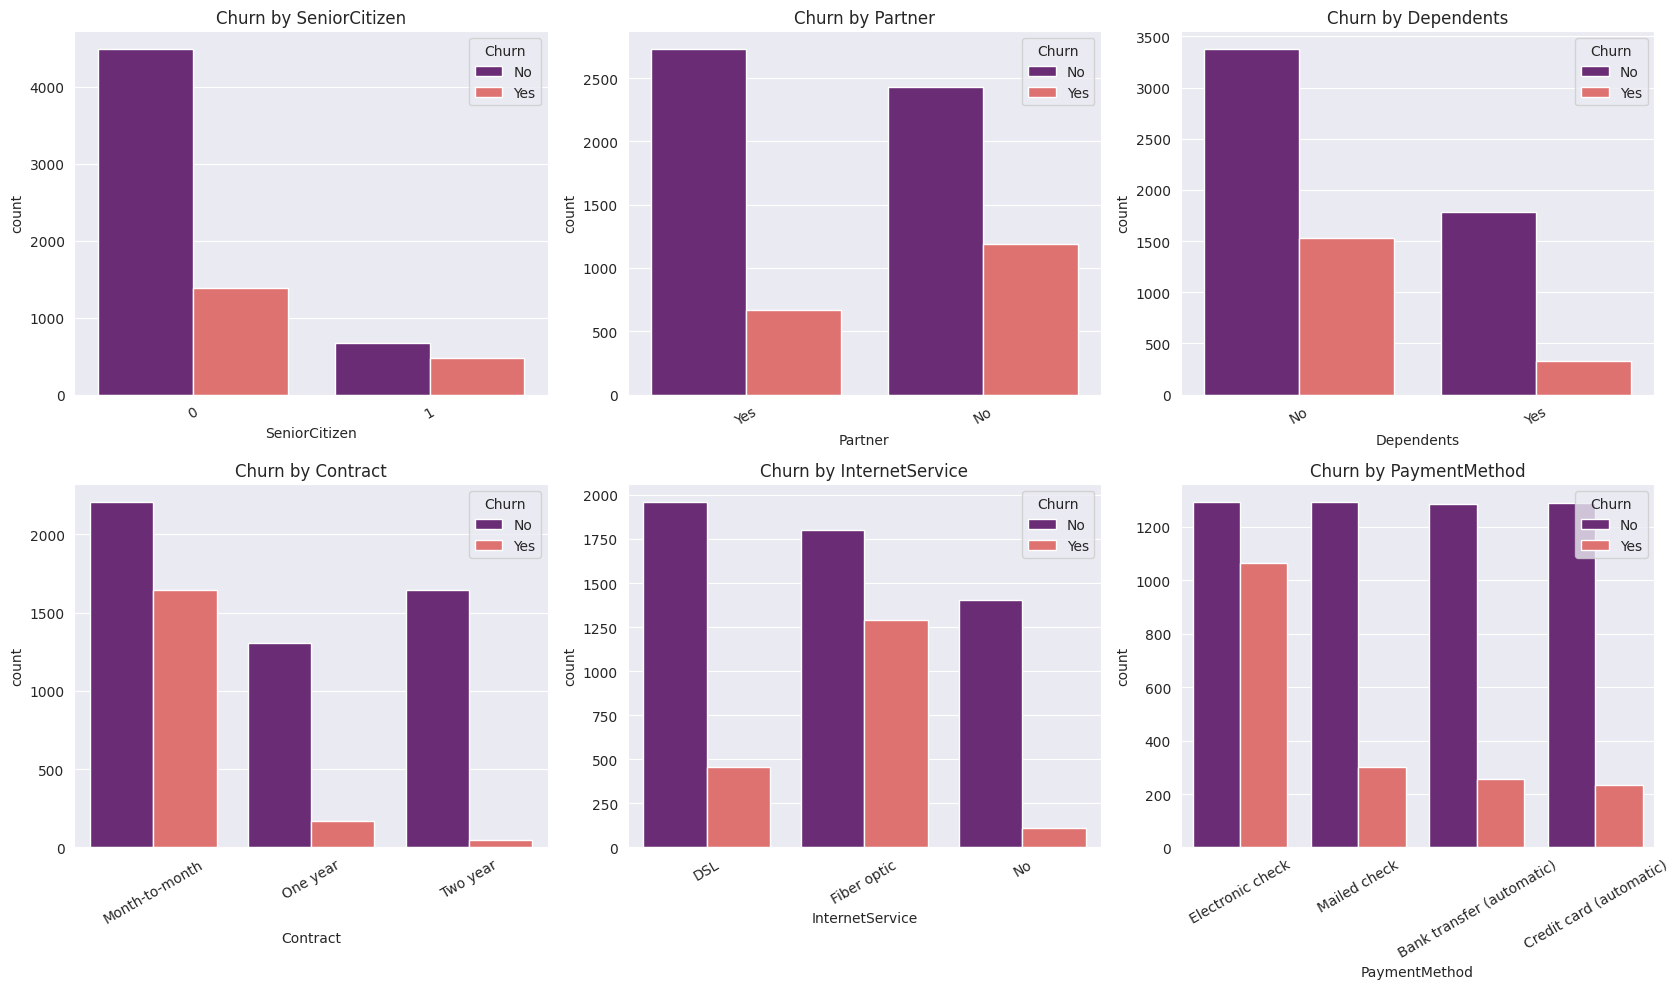

In [ ]:
# Category Feature Analysis
# To visualize how different demographics and contract types impact churn
# Key Catergorical columns for analysis;
cat_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'InternetService', 'PaymentMethod']

#Subplots Creation
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))
axes=axes.flatten()

for i, col in enumerate(cat_cols):
  sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='magma')
  axes[i].set_title(f'Churn by {col}')
  axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# **Categorical Feature Analysis**
Analysis Objective: To identify which customer segments and service types are most associated with churn.

## **Findings & Insights**
### **Contract Type (The strongest predictor):**

**Insight:** Customers on Month-to-month contracts have a massive churn rate compared to those on One-year or Two-year contracts.

**Recommendation:** The company should offer discounts or loyalty perks to encourage month-to-month users to switch to long-term contracts.

### **Internet Service:**

**Insight:** Fiber optic users churn at a significantly higher rate than DSL users.

**Observation:** This is surprising as Fiber is faster; it may suggest issues with Fiber pricing, service reliability, or poor customer support for that specific technology.

### **Payment Method:**

**Insight:** Customers paying by Electronic check show the highest churn.

**Observation:** Customers using automated methods (Bank transfer or Credit card) tend to be more stable and stay longer.

### **Demographics (Seniority & Dependents):**

**Insight:** Senior Citizens have a higher churn percentage than younger customers.

**Insight:** Customers with Partners or Dependents are less likely to churn. These "family" accounts usually represent more stable, multi-person households which are more "sticky."

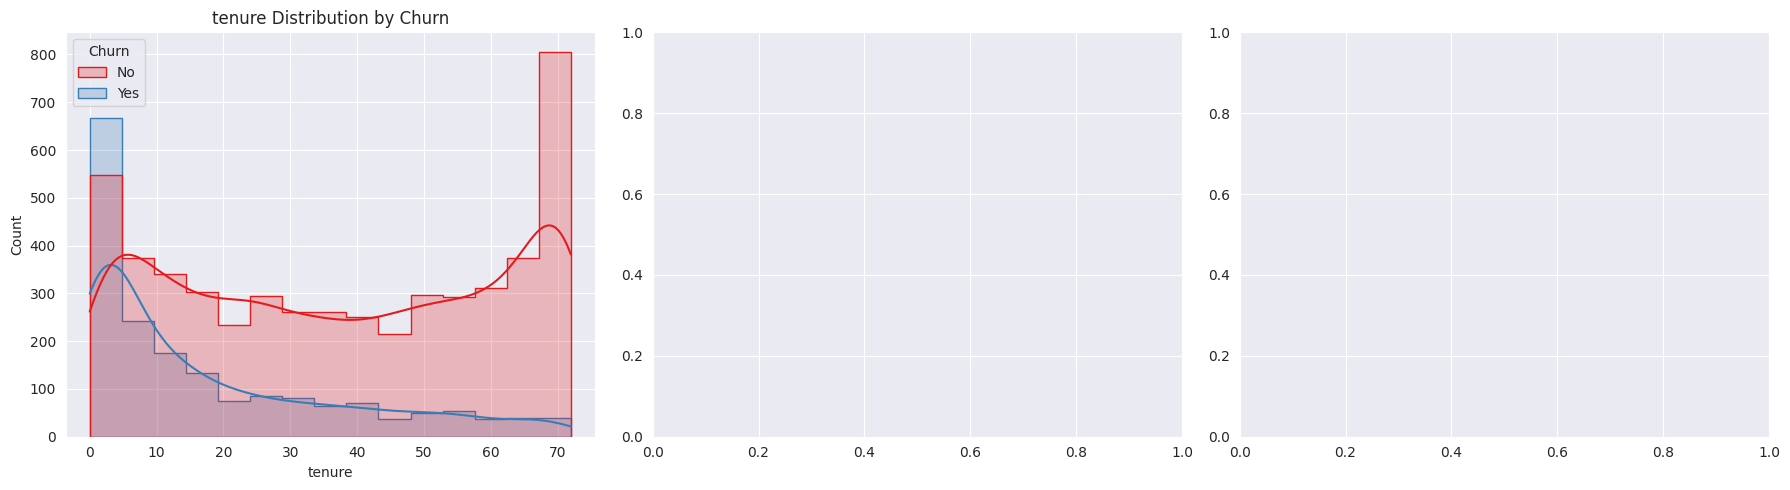

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# For Numerical Analysis
# Which shos the relationship between tenure, charges and likelihood of a customer leaving
# Numerical Columns for Analysis
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for i, col in enumerate(num_cols):
  sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i], palette='Set1', element="step")
  axes[i].set_title(f'{col} Distribution by Churn')

  plt.tight_layout()
  plt.show()

# **Numerical Feature Analysis**
Analysis Objective: To determine how a customer’s length of stay (tenure) and their billing amounts (Monthly & Total Charges) influence their decision to leave.

## **Findings & Insights**
### **Tenure (Customer Loyalty):**

**Insight:** There is a massive spike in churn for customers with 0 to 6 months of tenure.

**Observation:** The "danger zone" is the first year. If a customer stays past the 20-month mark, their likelihood of churning drops significantly. This suggests that the onboarding experience and initial service satisfaction are critical.

### **Monthly Charges (Price Sensitivity):**

**Insight:** Customers with high Monthly Charges (approx. $70 – $110) churn at a much higher rate than those with low charges ($20 – $30).

**Observation: **The "sweet spot" for retention is the lower price bracket. High-paying customers are more likely to be Fiber Optic users (as seen in the previous analysis), further proving that high-cost services are the most at-risk.

### **Total Charges:**

**Insight:** Churn is heavily concentrated at the lower end of Total Charges.

**Observation:** This aligns with the Tenure finding. Since churned customers leave early, they never accumulate high Total Charges. This confirms that the company is losing revenue potential early in the customer lifecycle.

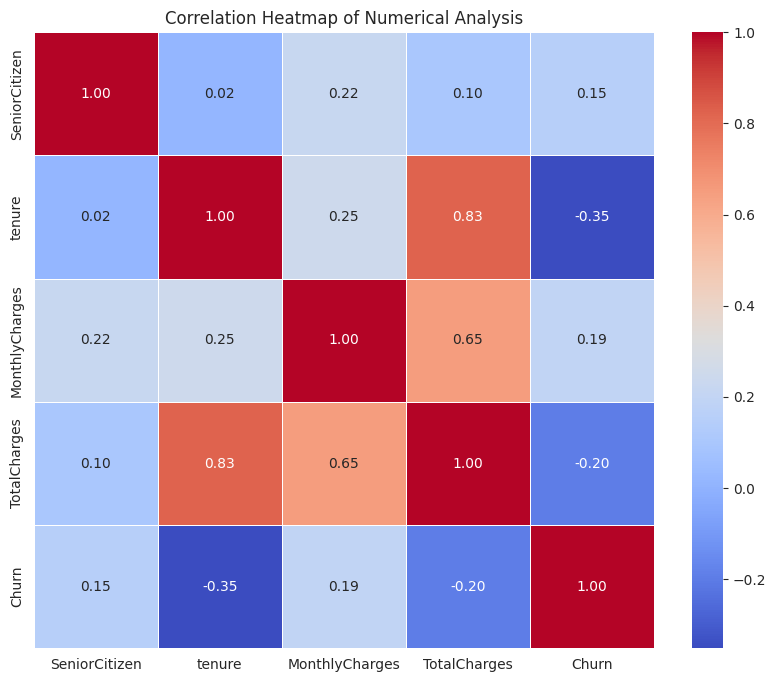

In [ ]:
# To know the factors that moves together (like how TotalCharge and tenure relate)
# Lets Map Churn to 1/0 to inlcude it in the correlation matrix

df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

#Plotting heatmap of numerical Analysis
plt.figure(figsize=(10,8))
correlation_matrix = df_corr.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Analysis')
plt.show()

# **Correlation Analysis**
**Analysis Objective:** To identify the linear relationships between numerical variables and the target variable (Churn).

## **Findings & Insights**
### **Multicollinearity (The Redundancy Check):**
**Insight:** There is a very strong positive correlation (usually $> 0.80$) between tenure and TotalCharges, as well as MonthlyCharges and TotalCharges.

**Observation:** This is logical—the longer a customer stays and the more they pay monthly, the higher their total bill.

### **Correlation with Churn (The Predictor Check):**
**Tenure vs. Churn:** Usually shows a negative correlation. As tenure increases, churn decreases. This confirms that loyalty grows over time.

**Monthly Charges vs. Churn:** Usually shows a positive correlation. As monthly charges go up, the likelihood of churn also increases, suggesting price sensitivity.

**Senior Citizen:** Often shows a small positive correlation with churn, indicating that seniors are slightly more likely to leave.

/tmp/ipython-input-1088886094.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=df_corr['Churn'], data=df, ci=None, palette='Blues')
/tmp/ipython-input-1088886094.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=df_corr['Churn'], data=df, ci=None, palette='Blues')
/tmp/ipython-input-1088886094.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=df_corr['Churn'], data=df, ci=None, palette='Blues')
/tmp/ipython-input-1088886094.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=df_corr['Churn'], data=df, ci=None, palette='Blue

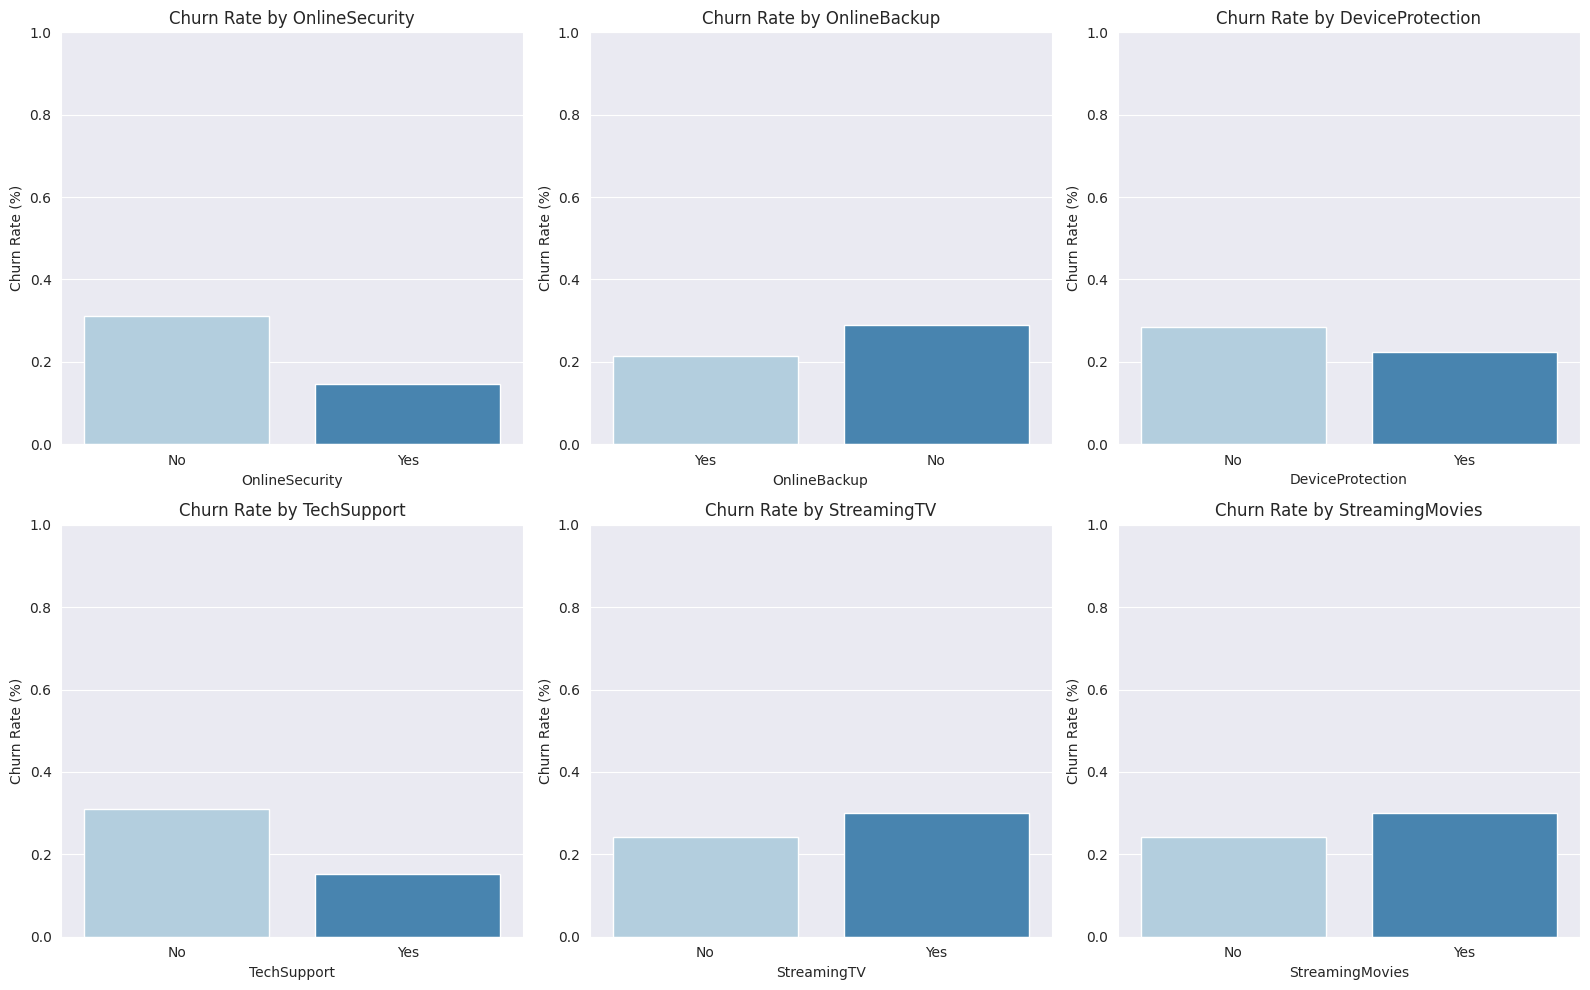

In [ ]:
# Service Effect Analysis
#This analysis shows which specific services are most effective at reducing churn.
services= ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#Plotting the Churn rate across services
plt.figure(figsize=(16,10))

for i, col in enumerate(services, 1):
  plt.subplot(2,3,i)

  # Churn rate percentage for each category in the service
  sns.barplot(x=col, y=df_corr['Churn'], data=df, ci=None, palette='Blues')
  plt.title(f'Churn Rate by {col}')
  plt.ylabel('Churn Rate (%)')
  plt.ylim(0,1)  # set Y axis to 0-100% scale

plt.tight_layout()
plt.show()

# **Service "Stickiness" Analysis**
**Analysis Objective:** To identify which value-added services have the strongest impact on customer retention.

## **Findings & Insights**
### **The "Security & Support" Shield:**
**Insight:** Customers who have OnlineSecurity and TechSupport have significantly lower churn rates (often below 15%) compared to those who don't (who often churn at rates above 40%).

**Observation:** These are sticky services. Once a customer sets up security or relies on tech support, the cost of switching to a competitor feels higher.

### **Entertainment vs. Utility:**
**Insight:** StreamingTV and StreamingMovies have a much smaller impact on churn. Customers with these services churn at roughly the same rate as those without them.

**Observation:** Entertainment services are seen as "add-ons," whereas Security and Support are seen as "essential," making them better tools for retention.

## **Recommendations**
**Bundle for Retention:**The marketing team should bundle "Tech Support" and "Online Security" into the Fiber Optic plans, as we identified Fiber Optic users as a high-risk group.

**Free Trials:** Offering a 3-month free trial of Online Backup or Security to new customers (tenure < 6 months) could help them survive the "danger zone" identified in our numerical analysis.

/tmp/ipython-input-1681223719.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'No', 'tenure'], label='Stayed', shade=True)
/tmp/ipython-input-1681223719.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'tenure'], label='Churned', shade=True)
/tmp/ipython-input-1681223719.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], label='Stayed', shade=True)
/tmp/ipython-input-1681223719.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; ple

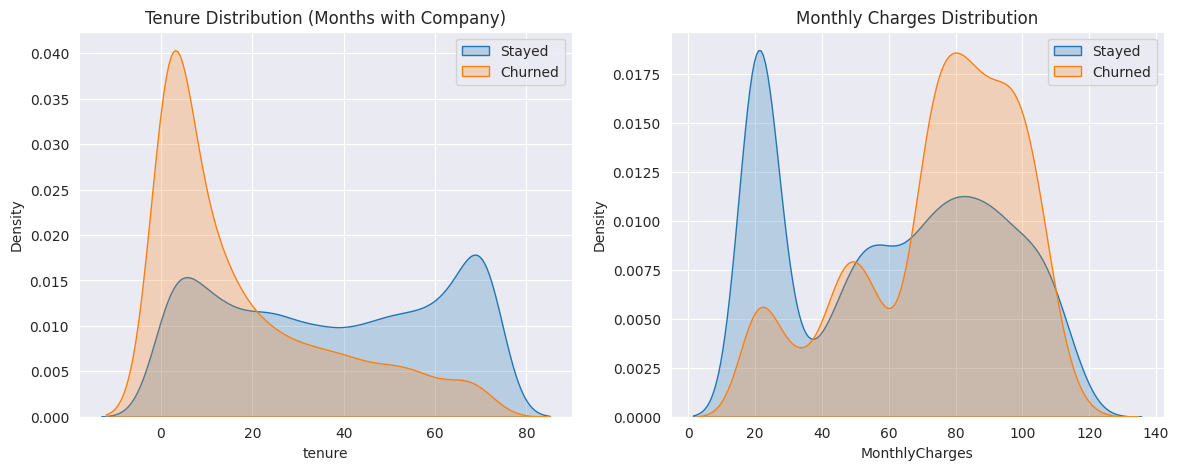

In [ ]:
# Financial and Tenure Analysis
# Lets see how spending relates to Loyalty.
# Relationship between Tenure, MonthlyCharges, and Churn
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'tenure'], label='Stayed', shade=True)
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'tenure'], label='Churned', shade=True)
plt.title('Tenure Distribution (Months with Company)')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], label='Stayed', shade=True)
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], label='Churned', shade=True)
plt.title('Monthly Charges Distribution')
plt.legend()

plt.show()

# **Tenure and Monthly Charges (Density Analysis)**
**Analysis Objective:** To visualize the probability density of churn across time (Tenure) and cost (Monthly Charges) to pinpoint the "High-Risk Zones."

## **Findings & Insights**
### **The "New Customer" Vulnerability (Tenure Plot):**

**Insight:** The "Churned" (Yes) curve has a massive peak between 0 and 12 months.

**Observation:** The "Stayed" (No) curve is much flatter and actually increases toward the end (70+ months). This proves that the longer a customer stays, the more loyal they become. The first year is the "make or break" period for the business.

### **The "Price Pressure" (Monthly Charges Plot):**

**Insight: **The "Stayed" curve has its highest peak at the low end (around $20/month).

**Insight: **The "Churned" curve starts rising sharply after $70/month, peaking around $80-$100.

**Observation:** Customers are highly price-sensitive. High monthly bills are a clear trigger for churn.

### **Summary**
**Retention focus:** Marketing efforts should be focused on customers in their first 6 months who have bills exceeding $70. This specific group is the most likely to leave.

## **Final Project Conclusion**

Through this Exploratory Data Analysis, we have identified the primary drivers of customer churn for Telco:

1. **Contract Type is the #1 Predictor:** Month-to-month contracts are the highest risk. Moving customers to 1 or 2-year contracts is the most effective way to reduce churn.
2. **The "First Year" is Critical:** Most churn happens within the first 12 months. Improved onboarding and "New Customer" discounts in the first year could improve retention.
3. **Fiber Optic & Pricing Issues:** High monthly charges (above $70) and Fiber Optic service are associated with higher churn. This suggests a need to review Fiber Optic service quality or pricing competitiveness.
4. **Service Stickiness:** Essential utility services like **Tech Support** and **Online Security** are strong anchors. Customers with these services are significantly more likely to stay.

### **Recommendation:**
To reduce churn, Telco should target new month-to-month customers with high monthly bills by offering them bundles that include Tech Support and Online Security at a discounted rate if they commit to a 1-year contract.